# **Install Dependencies**

In [1]:
!pip install gurobipy==10.0.0 matplotlib==3.5.2 numpy==1.21.5 pandas==1.4.4 scikit-learn==1.2.1 PySCIPOpt

INFO: pip is looking at multiple versions of scipy to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 27.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 60.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 58.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 69.3 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━

In [5]:
import numpy as np
import pandas as pd
from pyscipopt.scip import Model

# **fragility_index.py**

In [6]:
# %load /kaggle/input/frazileindex-files/fragility_index.py
import numpy as np
import pandas as pd
import gurobipy as gp
from gurobipy import GRB

def Data_load(data_name):        
    if data_name == 'BreastCancerCoimbra':
        data = pd.read_excel('/kaggle/input/datamining/Data/Breast Cancer Coimbra Data Set .xlsx')
        x = data.values[:,:-1]
        y = np.array([1 if data.values[i,-1]==1 else -1 for i in range(data.values[:,-1].shape[0])])
        
    elif data_name == 'BreastCancerPrognostic':
        data = pd.read_excel('/kaggle/input/datamining/Data/Breast Cancer Wisconsin Prognostic .xlsx',header=None)
        data.fillna(method= 'ffill', inplace=True)
        x = data.values[:,1:]
        y = np.array([1 if data.values[i,0]=='N' else -1 for i in range(data.values[:,0].shape[0])])

    elif data_name == 'LiverPatient':
        data = pd.read_csv('/kaggle/input/datamining/Data/Indian Liver Patient Dataset (ILPD).csv',engine="python",header=None)
        data[1] = [1 if data.values[i,1] == 'Male' else 0 for i in range(data.values.shape[0])]
        data.fillna(method= 'ffill', inplace=True)
        x = data.values[:,:-1]
        y = np.array([1 if data.values[i,-1]==1 else -1 for i in range(data.values[:,-1].shape[0])])
    
    elif data_name == 'GermanCredit':
        data = pd.read_excel('/kaggle/input/datamining/Data/GermanCredit.xlsx',header=None)
        x = data.values[:,:-1]
        y = np.array([1 if data.values[i,-1] ==1 else -1 for i in range(data.values[:,-1].shape[0])])
    
    elif data_name == 'LiverDisorders':
        data = pd.read_excel('/kaggle/input/datamining/Data/LiverDisorders.xlsx',header=None)
        x = data.values[:,:-1]
        y = np.array([1 if data.values[i,-1] ==1 else -1 for i in range(data.values[:,-1].shape[0])])
    elif data_name=="Australian":
        data = pd.read_csv('/kaggle/input/datamining/Data/Australian Credit Approval.csv')
        x = data.values[:,:-1]
        y = np.array([1 if data.values[i,-1] ==1 else -1 for i in range(data.values[:,-1].shape[0])])
    
    elif data_name=="Diabetes":
        data = pd.read_csv('/kaggle/input/datamining/Data/Diabetes dataset.csv')
        x = data.values[:,:-1]
        y = np.array([1 if data.values[i,-1] ==1 else -1 for i in range(data.values[:,-1].shape[0])])
    
    elif data_name=="Ionosphere":
        data = pd.read_csv('/kaggle/input/datamining/Data/Johns Hopkins University Ionosphere database.csv',header=None)
        x = data.values[:,:-1]
        y = np.array([1 if data.values[i,-1] =='g' else -1 for i in range(data.values[:,-1].shape[0])])
    elif data_name=='SpamBase':
        data = pd.read_csv('/kaggle/input/datamining/Data/SPAM E-MAIL DATABASE ATTRIBUTES.csv',header=None)
        x = data.values[:,:-1]
        y = np.array([1 if data.values[i,-1] ==1 else -1 for i in range(data.values[:,-1].shape[0])])
    elif data_name=='Sonar':
        data = pd.read_csv('/kaggle/input/datamining/Data/Sonar.csv',header=None)
        x = data.values[:,:-1]
        y = np.array([1 if data.values[i,-1] =='R' else -1 for i in range(data.values[:,-1].shape[0])])
    else:
        print('No data')
        
    return x,y

# def FI_calculation(score,y):
#     """
#     Calculate the KL-divergence based FI by Algorithm 1
#     Input:
#         score: score value h(x) of each test sample x.
#         y: true class label.
        
#     Output:
#         value of FI
#     """
    
#     sample_p = score[y==1]      # positive samples
#     sample_n = score[y==-1]      # negative samples
    
#     N_p = sample_p.shape[0]
#     N_n = sample_n.shape[0]
    
#     S = N_p * N_n           #number of samples of ranking errors
    
#     error = np.zeros(S)     # ranking error
#     for i in range(N_p):
#         for j in range(N_n):
#             error[i * N_n + j] = sample_n[j] - sample_p[i]
            
            
#     def expectation(error,k):
#         # calculate the empirical expectation given the value of k
#         x = 0
#         for i in range(error.shape[0]):
#             x += np.exp(error[i]/k)
            
#         return x/error.shape[0]
    
            
#     if (error<0).sum() == 0:
#         return 0, error
#     elif error.mean()>0:
#         return np.Inf, error
#     else:       
#         k_min = 10
#         e = expectation(error,k_min)
#         while (e <= 1) & (k_min>1e-4) :
#             k_min = k_min/2
#             e = expectation(error,k_min)
#             #print(k_min)
            
#         if k_min <= 1e-4:
#             return 0,error
#         else:
#             k_max = k_min * 2
            
#             while k_max - k_min > 1e-3:
#                 k = (k_min + k_max) / 2
#                 e = expectation(error,k)
#                 if e <= 1:
#                     k_max = k
#                 else:
#                     k_min = k
                    
#                 #print(k_max,k_min)
            
#             return k_max, error
    
    
 
# def bAUC_calculation(samples, estimate=True):

#     """
#     Calculte bAUC given the samples of ranking error
#     Formulation can be found in Norton M, Uryasev S. Maximization of auc and buffered auc in binary classification[J]. Mathematical Programming, 2019, 174(1): 575-612.
#     """

#     ################# estimate bPOE by simply sorting samples #################
#     if estimate==True:
#         N=samples.shape[0]
#         sorted_samples=sorted(samples)
    
#         cvar=sorted_samples[-1]
#         probability_level=1
#         for i in range(N):
#             probability_level = probability_level - 1/float(N)
#             cvar = (cvar*(i) + sorted_samples[-(i+1)])/float(i+1)
#             if cvar <=0: break
    
#         var=sorted_samples[int( probability_level*N ) ]
#         bPOE=1-probability_level
#         bAUC=probability_level
#         # a=1/float(-var)
#         gamma=var
#         return bAUC
#     ######################Get bAUC exactly by solving an LP#############################

    
#     m = gp.Model()
#     m.setParam("OutputFlag",0)

#     E=[]
 
#     for i in range(samples.shape[0]):
#         E.append(m.addVar(lb=0,ub=GRB.INFINITY,obj=0,vtype=GRB.CONTINUOUS,name="E"+str(i) ))
#     a=m.addVar(lb=0,ub=GRB.INFINITY,obj=0,vtype=GRB.CONTINUOUS,name="a" )  

#     m.update()
#     m.setObjective( (1/float(samples.shape[0]))*gp.quicksum(E[i] for i in range(samples.shape[0])  ),GRB.MINIMIZE)
    
#     m.optimize()
    
#     for i in range(samples.shape[0]):
#         m.addConstr ( E[i]      >= a * (samples[i]) + 1            )
#         m.addConstr ( E[i]      >= 0                               )
    
#     m.optimize()
#     bPOE=m.getObjective().getValue()
#     bAUC=1-bPOE
        
#     return bAUC
    
 
# def FI_minimization(N,S,data_sample,lb_p,lb_n,ub_p,ub_n,LogToConsole=False):
    
#     """
#     Train linear classifier by minimizing wasserstein based FI.

#     Input:
#         N: dimension of features.
#         data_sample: samples in the empirical distribution of ranking errors.
#         S: number of samples in the empirical distribution of ranking errors.
#         lb_p, ub_p: lower bound and upper bound for the features of positive samples.
#         lb_n, ub_n: lower bound and upper bound for the features of negativee samples.

        
#     Output:
#         w_solu: decision variable for the linear classifier
#     """
    
#     MM = gp.Model()
#     MM.Params.LogToConsole=LogToConsole

    
#     k = MM.addVar(lb = 0,ub = GRB.INFINITY,vtype=GRB.CONTINUOUS,name="k")
#     p1 = MM.addVars(S,N,lb = 0,ub = GRB.INFINITY,vtype=GRB.CONTINUOUS,name="p1")
#     p2 = MM.addVars(S,N,lb = 0,ub = GRB.INFINITY,vtype=GRB.CONTINUOUS,name="p2")
#     q1 = MM.addVars(S,N,lb = 0,ub = GRB.INFINITY,vtype=GRB.CONTINUOUS,name="q1")
#     q2 = MM.addVars(S,N,lb = 0,ub = GRB.INFINITY,vtype=GRB.CONTINUOUS,name="q2")
    
#     r = MM.addVars(S,2*N,lb = -GRB.INFINITY,ub = GRB.INFINITY,vtype=GRB.CONTINUOUS,name="r")
#     r_abs = MM.addVars(S,2*N,lb = 0,ub = GRB.INFINITY,vtype=GRB.CONTINUOUS,name="r")
    
#     w = MM.addVars(N,lb = -GRB.INFINITY,ub = GRB.INFINITY, vtype=GRB.CONTINUOUS,name='w')
#     w_abs = MM.addVars(N,lb = 0,ub = GRB.INFINITY, vtype=GRB.CONTINUOUS,name='w')
    
#     aux = MM.addVars(S,lb = -GRB.INFINITY,ub = GRB.INFINITY,vtype=GRB.CONTINUOUS,name="aux")
    
    
#     MM.setObjective(k,GRB.MINIMIZE)
    
#     MM.addConstr( sum( aux[s] for s in range(S) )
#                   <= 0 )
    
#     MM.addConstrs(sum(- p1[s,n] * lb_p[n] + p2[s,n] * ub_p[n] 
#                         - q1[s,n] * lb_n[n] + q2[s,n] * ub_n[n] 
#                         for n in range(N))
#                     + sum(r[s,n] * data_sample[s,n]
#                         for n in range(2*N))
#                     == aux[s]
#                   for s in range(S))
    
#     MM.addConstrs(- p1[s,n] + p2[s,n] 
#                   == 
#                   - w[n] - r[s,n] 
#                   for s in range(S) for n in range(N))
    
#     MM.addConstrs(- q1[s,n] + q2[s,n] 
#                   ==
#                   w[n] - r[s,N+n] 
#                   for s in range(S) for n in range(N))
    
    
#     MM.addConstrs(r_abs[s,n] == gp.abs_(r[s,n]) for s in range(S) for n in range(2*N))
#     MM.addConstrs(r_abs[s,n] <= k for s in range(S) for n in range(2*N))
    
    

#     MM.addConstrs(w_abs[n] == gp.abs_(w[n]) for n in range(N))
#     MM.addConstr(gp.quicksum(w_abs[n] for n in range(N)) == 1 )

#     MM.optimize()

    
#     w_solu = np.zeros(N)
#     for n in range(N):
#         w_solu[n] = w[n].x

    
#     return w_solu


# def bAUC(N,S,data_sample,LogToConsole=False):
    
#     """
#     Train linear classifier by maximizing bAUC
#     Formulation can be found in Norton M, Uryasev S. Maximization of auc and buffered auc in binary classification[J]. Mathematical Programming, 2019, 174(1): 575-612.
    
#     Input:
#         N: dimension of features.
#         data_sample: samples in the empirical distribution of ranking errors.
#         S: number of samples in the empirical distribution of ranking errors.
        
#     Output:
#         w_solu: decision variable for the linear classifier
#     """
    
#     MM = gp.Model()
#     MM.Params.LogToConsole=LogToConsole
    
    
#     w = MM.addVars(N,lb = -GRB.INFINITY,ub = GRB.INFINITY, vtype=GRB.CONTINUOUS,name='w')
#     w_abs = MM.addVars(N,lb = 0,ub = GRB.INFINITY, vtype=GRB.CONTINUOUS,name='w')

#     r = MM.addVars(S,lb = 0,ub = GRB.INFINITY,vtype=GRB.CONTINUOUS,name="r")
    
#     MM.setObjective(gp.quicksum(r[s] for s in range(S)),GRB.MINIMIZE)
    
#     MM.addConstrs(r[s] >= 
#                   sum(w[n]*(data_sample[s,N+n]-data_sample[s,n]) for n in range(N)) +1
#                   for s in range(S))
    

#     MM.addConstrs(w_abs[n] == gp.abs_(w[n]) for n in range(N))
#     MM.addConstr(gp.quicksum(w_abs[n] for n in range(N)) == 1 )
    
#     MM.setParam("NonConvex", 2)
    
#     MM.optimize()
    
#     w_solu = np.zeros(N)
#     for n in range(N):
#         w_solu[n] = w[n].x
    
#     return w_solu

     

# def performance(data_name,name,w,N,S_test,data_test):
#     """
#     For section 5.3 Optimization for linear classifiers.
#     Calculating the statistic descriptions of ranking errors.
    
#     Output: performance table
#     """
#     ranking_error = np.zeros(S_test)
#     for s in range(S_test):
#         ranking_error[s] = w.dot(data_test[s,N:]) - w.dot(data_test[s,:N])
    
#     # ranking_error_pos = ranking_error[ranking_error >= 0]
    
#     v_prob = np.mean(ranking_error <= 0)
#     v_mean = np.mean(ranking_error[ranking_error >= 0])
#     v_std = np.std(ranking_error)
#     v_var95 = np.quantile(ranking_error, 0.95)
#     v_var99 = np.quantile(ranking_error, 0.99)
#     v_cvar95 = np.mean(ranking_error[ranking_error>=v_var95])
#     v_cvar99 = np.mean(ranking_error[ranking_error>=v_var99])
    
#     perf_df = pd.DataFrame({"Data_name":[data_name],
#                             "Model_name": [name], 
#                             "Probability": [v_prob],
#                             "Mean": [v_mean],
#                             "Std": [v_std],
#                             "VaR%95": [v_var95],
#                             "CVaR%95": [v_cvar95],
#                             "VaR%99": [v_var99],
#                             "CVaR%99": [v_cvar99]})
        
#     return perf_df

# def calculate_error(classifier, x, y):
#     score = classifier.decision_function(x)

#     sample_p = score[y==1]      # positive samples
#     sample_n = score[y==-1]      # negative samples
    
#     N_p = sample_p.shape[0]
#     N_n = sample_n.shape[0]
    
#     S = N_p * N_n           #number of samples of ranking errors
    
#     error = np.zeros(S)     # ranking error
#     for i in range(N_p):
#         for j in range(N_n):
#             error[i * N_n + j] = sample_n[j] - sample_p[i]
    
#     return error


# def performance_of_error(data_name, name, ranking_error):
#     v_prob = np.mean(ranking_error <= 0)
#     v_mean = np.mean(ranking_error[ranking_error >= 0])
#     v_std = np.std(ranking_error)
#     v_var95 = np.quantile(ranking_error, 0.95)
#     v_var99 = np.quantile(ranking_error, 0.99)
#     v_cvar95 = np.mean(ranking_error[ranking_error>=v_var95])
#     v_cvar99 = np.mean(ranking_error[ranking_error>=v_var99])
    
#     perf_df = pd.DataFrame({"Data_name":[data_name],
#                             "Model_name": [name], 
#                             "AUC": [v_prob],
#                             "Mean": [v_mean],
#                             "Std": [v_std],
#                             "VaR%95": [v_var95],
#                             "CVaR%95": [v_cvar95],
#                             "VaR%99": [v_var99],
#                             "CVaR%99": [v_cvar99]})
        
#     return perf_df

    

In [8]:
def FI_calculation(score, y):
    """
    Calculate the KL-divergence based FI by Algorithm 1
    Input:
        score: score value h(x) of each test sample x.
        y: true class label.
        
    Output:
        value of FI
    """

    sample_p = score[y == 1]  # positive samples
    sample_n = score[y == -1]  # negative samples

    N_p = sample_p.shape[0]
    N_n = sample_n.shape[0]

    S = N_p * N_n  # number of samples of ranking errors

    error = np.zeros(S)  # ranking error
    for i in range(N_p):
        for j in range(N_n):
            error[i * N_n + j] = sample_n[j] - sample_p[i]

    def expectation(error, k):
        # calculate the empirical expectation given the value of k
        x = 0
        for i in range(error.shape[0]):
            x += np.exp(error[i] / k)

        return x / error.shape[0]

    if (error < 0).sum() == 0:
        return 0, error
    elif error.mean() > 0:
        return np.Inf, error
    else:
        k_min = 10
        e = expectation(error, k_min)
        while (e <= 1) & (k_min > 1e-4):
            k_min = k_min / 2
            e = expectation(error, k_min)
            # print(k_min)

        if k_min <= 1e-4:
            return 0, error
        else:
            k_max = k_min * 2

            while k_max - k_min > 1e-3:
                k = (k_min + k_max) / 2
                e = expectation(error, k)
                if e <= 1:
                    k_max = k
                else:
                    k_min = k

                # print(k_max,k_min)

            return k_max, error

In [9]:
def bAUC_calculation(samples, estimate=True):
    
#     Calculte bAUC given the samples of ranking error
#     Formulation can be found in Norton M, Uryasev S. Maximization of auc and buffered auc in binary classification[J]. 
#     Mathematical Programming, 2019, 174(1): 575-612.
    

    ################# estimate bPOE by simply sorting samples #################
    if estimate == True:
        N = samples.shape[0]
        sorted_samples = sorted(samples)

        cvar = sorted_samples[-1]
        probability_level = 1
        for i in range(N):
            probability_level = probability_level - 1 / float(N)
            cvar = (cvar * (i) + sorted_samples[-(i + 1)]) / float(i + 1)
            if cvar <= 0: break

        var = sorted_samples[int(probability_level * N)]
        bPOE = 1 - probability_level
        bAUC = probability_level
        return bAUC
    ######################Get bAUC exactly by solving an LP#############################

    N = samples.shape[0]
    m = Model("bAUC")

    E = []
    for i in range(N):
        E.append(m.addVar("E" + str(i), vtype="C", lb=0))

    a = m.addVar("a", vtype="C", lb=0)

    m.setObjective((1 / float(N)) * sum(E[i] for i in range(N)), "minimize")

    m.optimize()

    for i in range(N):
        m.addCons(E[i] >= a * samples[i] + 1)
        m.addCons(E[i] >= 0)

    m.optimize()
    bPOE = m.getObjVal()
    bAUC = 1 - bPOE

    return bAUC

In [10]:
def FI_minimization(N, S, data_sample, lb_p, lb_n, ub_p, ub_n, LogToConsole=False):
    
#     Train linear classifier by minimizing wasserstein based FI.

#     Input:
#         N: dimension of features.
#         data_sample: samples in the empirical distribution of ranking errors.
#         S: number of samples in the empirical distribution of ranking errors.
#         lb_p, ub_p: lower bound and upper bound for the features of positive samples.
#         lb_n, ub_n: lower bound and upper bound for the features of negativee samples.

#     Output:
#         w_solu: decision variable for the linear classifier

    MM = Model("FI_minimization")

    k = MM.addVar("k", vtype="C", lb=0)

    p1 = {i: MM.addVar("p1_{}".format(i), vtype="C", lb=0) for i in range(S * N)}
    p2 = {i: MM.addVar("p2_{}".format(i), vtype="C", lb=0) for i in range(S * N)}
    q1 = {i: MM.addVar("q1_{}".format(i), vtype="C", lb=0) for i in range(S * N)}
    q2 = {i: MM.addVar("q2_{}".format(i), vtype="C", lb=0) for i in range(S * N)}

    r = {i: MM.addVar("r_{}".format(i), vtype="C", lb=-MM.infinity()) for i in range(S * 2 * N)}
    r_abs = {i: MM.addVar("r_abs_{}".format(i), vtype="C", lb=0) for i in range(S * 2 * N)}

    w = {i: MM.addVar("w_{}".format(i), vtype="C", lb=-MM.infinity()) for i in range(N)}
    w_abs = {i: MM.addVar("w_abs_{}".format(i), vtype="C", lb=0) for i in range(N)}

    aux = {i: MM.addVar("aux_{}".format(i), vtype="C", lb=-MM.infinity()) for i in range(S)}

    MM.setObjective(k, "minimize")

    for s in range(S):
        MM.addCons(sum(
            -p1[s * N + n] * lb_p[n] + p2[s * N + n] * ub_p[n] - q1[s * N + n] * lb_n[n] + q2[s * N + n] * ub_n[n] for n
            in range(N)) + sum(r[s * 2 * N + n] * data_sample[s, n] for n in range(2 * N)) == aux[s])

    for s in range(S):
        for n in range(N):
            MM.addCons(-p1[s * N + n] + p2[s * N + n] == -w[n] - r[s * 2 * N + n])
            MM.addCons(-q1[s * N + n] + q2[s * N + n] == w[n] - r[s * 2 * N + N + n])

    for s in range(S):
        for n in range(2 * N):
            MM.addCons(r_abs[s * 2 * N + n] == abs(r[s * 2 * N + n]))
            MM.addCons(r_abs[s * 2 * N + n] <= k)

    for n in range(N):
        MM.addCons(w_abs[n] == abs(w[n]))
    MM.addCons(sum(w_abs[n] for n in range(N)) == 1)

    MM.optimize()

    w_solu = np.zeros(N)
    for n in range(N):
        w_solu[n] = w[n].getVal()

    return w_solu

In [11]:
def bAUC(N, S, data_sample, LogToConsole=False):
    
#     Train linear classifier by maximizing bAUC
#     Formulation can be found in Norton M, Uryasev S. Maximization of auc and buffered auc in binary classification[J]. Mathematical Programming, 2019, 174(1): 575-612.

#     Input:
#         N: dimension of features.
#         data_sample: samples in the empirical distribution of ranking errors.
#         S: number of samples in the empirical distribution of ranking errors.

#     Output:
#         w_solu: decision variable for the linear classifier

    MM = Model("bAUC")

    w = {i: MM.addVar("w_{}".format(i), vtype="C", lb=-MM.infinity()) for i in range(N)}
    w_abs = {i: MM.addVar("w_abs_{}".format(i), vtype="C", lb=0) for i in range(N)}

    r = {i: MM.addVar("r_{}".format(i), vtype="C", lb=0) for i in range(S)}

    MM.setObjective(sum(r[s] for s in range(S)), "minimize")

    for s in range(S):
        MM.addCons(r[s] >= sum(w[n] * (data_sample[s, N + n] - data_sample[s, n]) for n in range(N)) + 1)

    for n in range(N):
        MM.addCons(w_abs[n] == abs(w[n]))
    MM.addCons(sum(w_abs[n] for n in range(N)) == 1)

    MM.optimize()

    w_solu = np.zeros(N)
    for n in range(N):
        w_solu[n] = w[n].getVal()

    return w_solu

In [12]:
def performance(data_name, name, w, N, S_test, data_test):
    
#     For section 5.3 Optimization for linear classifiers.
#     Calculating the statistic descriptions of ranking errors.
    
#     Output: performance table
    
    ranking_error = np.zeros(S_test)
    for s in range(S_test):
        ranking_error[s] = w.dot(data_test[s, N:]) - w.dot(data_test[s, :N])

    # ranking_error_pos = ranking_error[ranking_error >= 0]

    v_prob = np.mean(ranking_error <= 0)
    v_mean = np.mean(ranking_error[ranking_error >= 0])
    v_std = np.std(ranking_error)
    v_var95 = np.quantile(ranking_error, 0.95)
    v_var99 = np.quantile(ranking_error, 0.99)
    v_cvar95 = np.mean(ranking_error[ranking_error >= v_var95])
    v_cvar99 = np.mean(ranking_error[ranking_error >= v_var99])

    perf_df = pd.DataFrame({"Data_name": [data_name],
                            "Model_name": [name],
                            "Probability": [v_prob],
                            "Mean": [v_mean],
                            "Std": [v_std],
                            "VaR%95": [v_var95],
                            "CVaR%95": [v_cvar95],
                            "VaR%99": [v_var99],
                            "CVaR%99": [v_cvar99]})

    return perf_df

In [13]:
def calculate_error(classifier, x, y):
    score = classifier.decision_function(x)

    sample_p = score[y == 1]  # positive samples
    sample_n = score[y == -1]  # negative samples

    N_p = sample_p.shape[0]
    N_n = sample_n.shape[0]

    S = N_p * N_n  # number of samples of ranking errors

    error = np.zeros(S)  # ranking error
    for i in range(N_p):
        for j in range(N_n):
            error[i * N_n + j] = sample_n[j] - sample_p[i]

    return error

In [14]:
def performance_of_error(data_name, name, ranking_error):
    v_prob = np.mean(ranking_error <= 0)
    v_mean = np.mean(ranking_error[ranking_error >= 0])
    v_std = np.std(ranking_error)
    v_var95 = np.quantile(ranking_error, 0.95)
    v_var99 = np.quantile(ranking_error, 0.99)
    v_cvar95 = np.mean(ranking_error[ranking_error >= v_var95])
    v_cvar99 = np.mean(ranking_error[ranking_error >= v_var99])

    perf_df = pd.DataFrame({"Data_name": [data_name],
                            "Model_name": [name],
                            "AUC": [v_prob],
                            "Mean": [v_mean],
                            "Std": [v_std],
                            "VaR%95": [v_var95],
                            "CVaR%95": [v_cvar95],
                            "VaR%99": [v_var99],
                            "CVaR%99": [v_cvar99]})

    return perf_df

# **Import Necessary Libraries**

In [15]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# **------------------------------------------------------------**
# **Classifiers:**
# **------------------------------------------------------------**
#              **1. Decision Tree (DT)**
#              **2. Random Forest (RF)**
#              **3. GaussianNB (GNB)**
#              **4. K-Nearest Neighbors (KNN)**
#              **5. AdaBoost (AD)**
#              **6. Gradient Boosting (GB)**
# **------------------------------------------------------------**

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# **------------------------------------------------------------**
# **Dataset: Diabetes** 
# **------------------------------------------------------------**

                   name       AUC      bAUC        FI  Accuracy  Precision  \
0         Decision Tree  0.670863  0.341624  0.678131  0.703247   0.580392   
0         Random Forest  0.831749  0.591160  0.176727  0.766883   0.703644   
0  Gaussian Naive Bayes  0.822378  0.522203  0.277954  0.758766   0.674905   
0   K-Nearest Neighbors  0.693452  0.386774  1.100494  0.739286   0.653948   
0              AdaBoost  0.814391  0.417505  0.057281  0.751948   0.670343   
0     Gradient Boosting  0.831405  0.570552  0.223724  0.766558   0.692075   
0   Logistic Regression  0.833807  0.585508  0.191315  0.777597   0.741554   
0            Linear SVC  0.833490  0.590228  0.098083  0.777922   0.742285   

     Recall                                  TN_and_FP  \
0  0.560302  [0.5084415584415584, 0.14253246753246754]   
0  0.579302  [0.5652597402597404, 0.08571428571428573]   
0  0.601399  [0.5490259740259741, 0.10194805194805197]   
0  0.538799  [0.5519480519480521, 0.09902597402597405]   
0  0.57

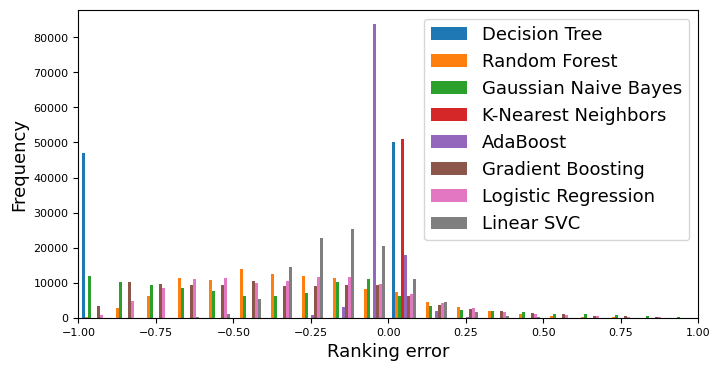

In [33]:
N_seeds = 20  # number of seeds
data_name = 'Diabetes'

dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=100)
nb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=5)
adaboost = AdaBoostClassifier(n_estimators=50)
gb = GradientBoostingClassifier()

lr = LogisticRegression()
svc = LinearSVC(C=1.0,max_iter=5000)

model_name_list = np.array(
    [[dt, 'Decision Tree'],
     [rf, 'Random Forest'],
     [nb, 'Gaussian Naive Bayes'],
     [knn, 'K-Nearest Neighbors'],
     [adaboost, 'AdaBoost'],
     [gb, 'Gradient Boosting'],
     [lr, 'Logistic Regression'],
     [svc, 'Linear SVC']])

x, y = Data_load(data_name)  # import data

perf = pd.DataFrame(columns=['name', 'AUC', 'bAUC', 'FI', 'Accuracy', 'Precision', 'Recall', 'Conf_matrix', 'error'])  # record results

for clf, name in model_name_list:
    AUC_mean = 0
    FI_mean = 0
    bAUC_mean = 0
    accuracy_mean = 0
    top_k_accuracy_mean = 0
    precision_mean = 0
    recall_mean = 0
    f1_mean = 0
    mcc_mean = 0
    conf_matrix_mean = np.zeros((2, 2))
    error_total = np.array([])
    for _seed in range(N_seeds):

        np.random.seed(_seed)
        X_sample, X_test, y_sample, y_test = train_test_split(x, y, test_size=0.2)

        scaler = StandardScaler()
        X_sample = scaler.fit_transform(X_sample)
        X_test = scaler.transform(X_test)
        X = scaler.transform(x)

        clf.fit(X_sample, y_sample)
        if clf == knn:  # If KNN classifier, no need to predict_proba
            prob_pos = clf.predict(X_test)
        elif clf == lr or clf == svc:
            func = clf.decision_function(X_test)
            prob_pos = 1/(1 + np.exp(-func))  # get probability by sigmoid function
        else:
            prob_pos = clf.predict_proba(X_test)[:, 1]  # Probability of positive class

        y_predict = clf.predict(X_test)
        

        AUC = roc_auc_score(y_test, prob_pos)
        FI, error = FI_calculation(prob_pos, y_test)
        bAUC = bAUC_calculation(error)

        accuracy = accuracy_score(y_test, y_predict)
        accuracy_mean += accuracy / N_seeds

        f1 = f1_score(y_test, y_predict)
        f1_mean += f1 / N_seeds

        mcc = matthews_corrcoef(y_test, y_predict)
        mcc_mean += mcc / N_seeds

        precision = precision_score(y_test, y_predict)
        precision_mean += precision / N_seeds

        recall = recall_score(y_test, y_predict)
        recall_mean += recall / N_seeds

        conf_matrix = confusion_matrix(y_test, y_predict, normalize='all')
        conf_matrix_mean += conf_matrix / N_seeds

        AUC_mean += AUC / N_seeds
        FI_mean += FI / N_seeds
        bAUC_mean += bAUC / N_seeds
        error_total = np.concatenate((error_total, error))

    perf_clf = pd.DataFrame({'name': [name],
                             'AUC': [AUC_mean],
                             'bAUC': [bAUC_mean],
                             'FI': [FI_mean],
                             'Accuracy': [accuracy_mean],
                             'TN_and_FP': [conf_matrix_mean[0]],
                             'FN_and_TP': [conf_matrix_mean[1]],
                             'Precision': [precision_mean],
                             'Recall': [recall_mean],
                             'F1': [f1_mean],
                             'MCC': [mcc_mean],
                             'error': [error_total]})

    perf = pd.concat([perf, perf_clf])

print(perf[['name', 'AUC', 'bAUC', 'FI', 'Accuracy', 'Precision', 'Recall', 'TN_and_FP', 'FN_and_TP', 'F1', 'MCC']])

plt.figure(figsize=(8, 4))
plt.hist(perf['error'].values, bins=40)
plt.legend(['Decision Tree', 'Random Forest', 'Gaussian Naive Bayes', 'K-Nearest Neighbors', 'AdaBoost', 'Gradient Boosting', 'Logistic Regression', 'Linear SVC'], fontsize=13)
ax = plt.gca()
ax.set_xlim(-1, 1)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('Ranking error', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.savefig('rank_error_Diabetes.png', dpi=300)
plt.show()

# **------------------------------------------------------------**
# **Dataset: Breast Cancer Coimbra** 
# **------------------------------------------------------------**

                   name       AUC      bAUC        FI  Accuracy  Precision  \
0         Decision Tree  0.714474  0.427458  0.550598  0.712500   0.710735   
0         Random Forest  0.809431  0.555798  0.171783  0.720833   0.716568   
0  Gaussian Naive Bayes  0.764118  0.380359  0.445221  0.633333   0.579324   
0   K-Nearest Neighbors  0.753168  0.525982  0.956940  0.743750   0.717650   
0              AdaBoost  0.785871  0.479498  0.090332  0.729167   0.722526   
0     Gradient Boosting  0.835479  0.572557  0.277374  0.756250   0.764900   
0   Logistic Regression  0.789189  0.518565  0.235016  0.739583   0.721742   
0            Linear SVC  0.785303  0.501653  0.150604  0.739583   0.709901   

     Recall                                   TN_and_FP  \
0  0.676634               [0.39375, 0.1333333333333334]   
0  0.677632   [0.4020833333333333, 0.12500000000000003]   
0  0.860738                   [0.2270833333333333, 0.3]   
0  0.782743  [0.37708333333333327, 0.15000000000000005]   
0 

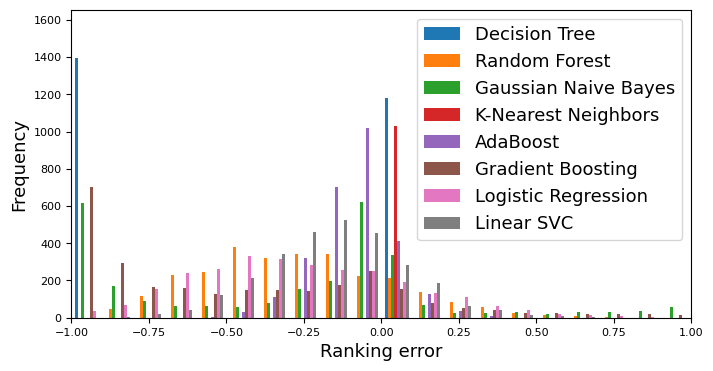

In [35]:
N_seeds = 20  # number of seeds
data_name ='BreastCancerCoimbra'

dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=100)
nb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=5)
adaboost = AdaBoostClassifier(n_estimators=50)
gb = GradientBoostingClassifier()

lr = LogisticRegression()
svc = LinearSVC(C=1.0,max_iter=5000)

model_name_list = np.array(
    [[dt, 'Decision Tree'],
     [rf, 'Random Forest'],
     [nb, 'Gaussian Naive Bayes'],
     [knn, 'K-Nearest Neighbors'],
     [adaboost, 'AdaBoost'],
     [gb, 'Gradient Boosting'],
     [lr, 'Logistic Regression'],
     [svc, 'Linear SVC']])

x, y = Data_load(data_name)  # import data

perf = pd.DataFrame(columns=['name', 'AUC', 'bAUC', 'FI', 'Accuracy', 'Precision', 'Recall', 'Conf_matrix', 'error'])  # record results

for clf, name in model_name_list:
    AUC_mean = 0
    FI_mean = 0
    bAUC_mean = 0
    accuracy_mean = 0
    top_k_accuracy_mean = 0
    precision_mean = 0
    recall_mean = 0
    f1_mean = 0
    mcc_mean = 0
    conf_matrix_mean = np.zeros((2, 2))
    error_total = np.array([])
    for _seed in range(N_seeds):

        np.random.seed(_seed)
        X_sample, X_test, y_sample, y_test = train_test_split(x, y, test_size=0.2)

        scaler = StandardScaler()
        X_sample = scaler.fit_transform(X_sample)
        X_test = scaler.transform(X_test)
        X = scaler.transform(x)

        clf.fit(X_sample, y_sample)
        if clf == knn:  # If KNN classifier, no need to predict_proba
            prob_pos = clf.predict(X_test)
        elif clf == lr or clf == svc:
            func = clf.decision_function(X_test)
            prob_pos = 1/(1 + np.exp(-func))  # get probability by sigmoid function
        else:
            prob_pos = clf.predict_proba(X_test)[:, 1]  # Probability of positive class

        y_predict = clf.predict(X_test)
        

        AUC = roc_auc_score(y_test, prob_pos)
        FI, error = FI_calculation(prob_pos, y_test)
        bAUC = bAUC_calculation(error)

        accuracy = accuracy_score(y_test, y_predict)
        accuracy_mean += accuracy / N_seeds

        f1 = f1_score(y_test, y_predict)
        f1_mean += f1 / N_seeds

        mcc = matthews_corrcoef(y_test, y_predict)
        mcc_mean += mcc / N_seeds

        precision = precision_score(y_test, y_predict)
        precision_mean += precision / N_seeds

        recall = recall_score(y_test, y_predict)
        recall_mean += recall / N_seeds

        conf_matrix = confusion_matrix(y_test, y_predict, normalize='all')
        conf_matrix_mean += conf_matrix / N_seeds

        AUC_mean += AUC / N_seeds
        FI_mean += FI / N_seeds
        bAUC_mean += bAUC / N_seeds
        error_total = np.concatenate((error_total, error))

    perf_clf = pd.DataFrame({'name': [name],
                             'AUC': [AUC_mean],
                             'bAUC': [bAUC_mean],
                             'FI': [FI_mean],
                             'Accuracy': [accuracy_mean],
                             'TN_and_FP': [conf_matrix_mean[0]],
                             'FN_and_TP': [conf_matrix_mean[1]],
                             'Precision': [precision_mean],
                             'Recall': [recall_mean],
                             'F1': [f1_mean],
                             'MCC': [mcc_mean],
                             'error': [error_total]})

    perf = pd.concat([perf, perf_clf])

print(perf[['name', 'AUC', 'bAUC', 'FI', 'Accuracy', 'Precision', 'Recall', 'TN_and_FP', 'FN_and_TP', 'F1', 'MCC']])

plt.figure(figsize=(8, 4))
plt.hist(perf['error'].values, bins=40)
plt.legend(['Decision Tree', 'Random Forest', 'Gaussian Naive Bayes', 'K-Nearest Neighbors', 'AdaBoost', 'Gradient Boosting', 'Logistic Regression', 'Linear SVC'], fontsize=13)
ax = plt.gca()
ax.set_xlim(-1, 1)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('Ranking error', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.savefig('rank_error_Diabetes.png', dpi=300)
plt.show()

# **------------------------------------------------------------**
# **Dataset: Liver Disorders** 
# **------------------------------------------------------------**

                   name       AUC      bAUC        FI  Accuracy  Precision  \
0         Decision Tree  0.650098  0.299725  0.863831  0.652899   0.619942   
0         Random Forest  0.757879  0.454886  0.198242  0.713043   0.749947   
0  Gaussian Naive Bayes  0.637990  0.147003  1.756561  0.551449   0.505487   
0   K-Nearest Neighbors  0.579479  0.162763       inf  0.589130   0.557397   
0              AdaBoost  0.754243  0.272456  0.121826  0.699275   0.692157   
0     Gradient Boosting  0.764894  0.457023  0.269287  0.700725   0.705201   
0   Logistic Regression  0.720695  0.362683  0.214508  0.686232   0.717344   
0            Linear SVC  0.721722  0.356374  0.113251  0.689130   0.714857   

     Recall                                   TN_and_FP  \
0  0.609703   [0.3804347826086957, 0.16956521739130437]   
0  0.552512   [0.4652173913043478, 0.08478260869565218]   
0  0.739312  [0.21956521739130433, 0.33043478260869574]   
0  0.455207   [0.38550724637681166, 0.1644927536231884]   
0 

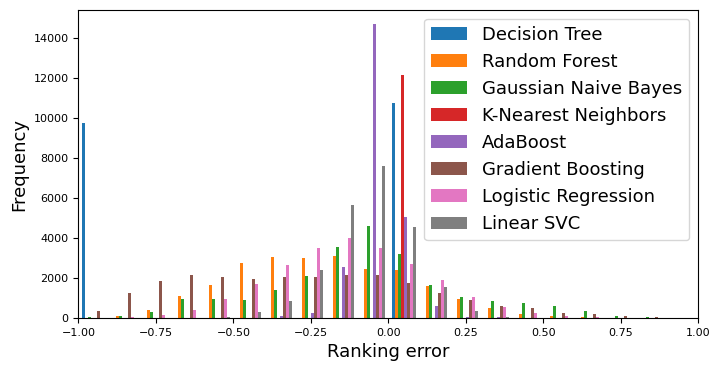

In [34]:
N_seeds = 20  # number of seeds
data_name = 'LiverDisorders'

dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=100)
nb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=5)
adaboost = AdaBoostClassifier(n_estimators=50)
gb = GradientBoostingClassifier()

lr = LogisticRegression()
svc = LinearSVC(C=1.0,max_iter=5000)

model_name_list = np.array(
    [[dt, 'Decision Tree'],
     [rf, 'Random Forest'],
     [nb, 'Gaussian Naive Bayes'],
     [knn, 'K-Nearest Neighbors'],
     [adaboost, 'AdaBoost'],
     [gb, 'Gradient Boosting'],
     [lr, 'Logistic Regression'],
     [svc, 'Linear SVC']])

x, y = Data_load(data_name)  # import data

perf = pd.DataFrame(columns=['name', 'AUC', 'bAUC', 'FI', 'Accuracy', 'Precision', 'Recall', 'Conf_matrix', 'error'])  # record results

for clf, name in model_name_list:
    AUC_mean = 0
    FI_mean = 0
    bAUC_mean = 0
    accuracy_mean = 0
    top_k_accuracy_mean = 0
    precision_mean = 0
    recall_mean = 0
    f1_mean = 0
    mcc_mean = 0
    conf_matrix_mean = np.zeros((2, 2))
    error_total = np.array([])
    for _seed in range(N_seeds):

        np.random.seed(_seed)
        X_sample, X_test, y_sample, y_test = train_test_split(x, y, test_size=0.2)

        scaler = StandardScaler()
        X_sample = scaler.fit_transform(X_sample)
        X_test = scaler.transform(X_test)
        X = scaler.transform(x)

        clf.fit(X_sample, y_sample)
        if clf == knn:  # If KNN classifier, no need to predict_proba
            prob_pos = clf.predict(X_test)
        elif clf == lr or clf == svc:
            func = clf.decision_function(X_test)
            prob_pos = 1/(1 + np.exp(-func))  # get probability by sigmoid function
        else:
            prob_pos = clf.predict_proba(X_test)[:, 1]  # Probability of positive class

        y_predict = clf.predict(X_test)
        

        AUC = roc_auc_score(y_test, prob_pos)
        FI, error = FI_calculation(prob_pos, y_test)
        bAUC = bAUC_calculation(error)

        accuracy = accuracy_score(y_test, y_predict)
        accuracy_mean += accuracy / N_seeds

        f1 = f1_score(y_test, y_predict)
        f1_mean += f1 / N_seeds

        mcc = matthews_corrcoef(y_test, y_predict)
        mcc_mean += mcc / N_seeds

        precision = precision_score(y_test, y_predict)
        precision_mean += precision / N_seeds

        recall = recall_score(y_test, y_predict)
        recall_mean += recall / N_seeds

        conf_matrix = confusion_matrix(y_test, y_predict, normalize='all')
        conf_matrix_mean += conf_matrix / N_seeds

        AUC_mean += AUC / N_seeds
        FI_mean += FI / N_seeds
        bAUC_mean += bAUC / N_seeds
        error_total = np.concatenate((error_total, error))

    perf_clf = pd.DataFrame({'name': [name],
                             'AUC': [AUC_mean],
                             'bAUC': [bAUC_mean],
                             'FI': [FI_mean],
                             'Accuracy': [accuracy_mean],
                             'TN_and_FP': [conf_matrix_mean[0]],
                             'FN_and_TP': [conf_matrix_mean[1]],
                             'Precision': [precision_mean],
                             'Recall': [recall_mean],
                             'F1': [f1_mean],
                             'MCC': [mcc_mean],
                             'error': [error_total]})

    perf = pd.concat([perf, perf_clf])

print(perf[['name', 'AUC', 'bAUC', 'FI', 'Accuracy', 'Precision', 'Recall', 'TN_and_FP', 'FN_and_TP', 'F1', 'MCC']])

plt.figure(figsize=(8, 4))
plt.hist(perf['error'].values, bins=40)
plt.legend(['Decision Tree', 'Random Forest', 'Gaussian Naive Bayes', 'K-Nearest Neighbors', 'AdaBoost', 'Gradient Boosting', 'Logistic Regression', 'Linear SVC'], fontsize=13)
ax = plt.gca()
ax.set_xlim(-1, 1)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('Ranking error', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.savefig('rank_error_Diabetes.png', dpi=300)
plt.show()

# **------------------------------------------------------------**
# **Dataset: Indian Liver Patient** 
# **------------------------------------------------------------**

                   name       AUC      bAUC        FI  Accuracy  Precision  \
0         Decision Tree  0.584524  0.168888  1.459778  0.659402   0.761446   
0         Random Forest  0.742094  0.399119  0.216644  0.703846   0.759849   
0  Gaussian Naive Bayes  0.730058  0.352108  0.354645  0.550000   0.948402   
0   K-Nearest Neighbors  0.561437  0.122640  4.579681  0.664103   0.745307   
0              AdaBoost  0.723761  0.299561  0.067047  0.697009   0.763200   
0     Gradient Boosting  0.718714  0.316170  0.334595  0.693162   0.749977   
0   Logistic Regression  0.746388  0.432055  0.153473  0.709829   0.738584   
0            Linear SVC  0.739352  0.413332  0.092010  0.714103   0.739192   

     Recall                                    TN_and_FP  \
0  0.761159    [0.11709401709401712, 0.1700854700854701]   
0  0.854048   [0.09487179487179485, 0.19230769230769226]   
0  0.390656  [0.27136752136752146, 0.015811965811965815]   
0  0.803362   [0.09145299145299145, 0.19572649572649573] 

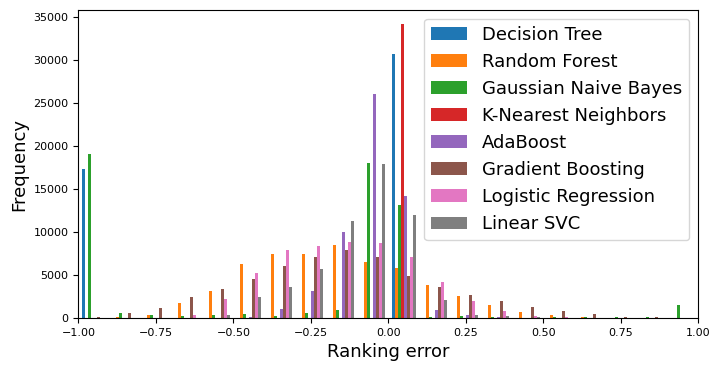

In [36]:
N_seeds = 20  # number of seeds
data_name = 'LiverPatient'

dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=100)
nb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=5)
adaboost = AdaBoostClassifier(n_estimators=50)
gb = GradientBoostingClassifier()

lr = LogisticRegression()
svc = LinearSVC(C=1.0,max_iter=5000)

model_name_list = np.array(
    [[dt, 'Decision Tree'],
     [rf, 'Random Forest'],
     [nb, 'Gaussian Naive Bayes'],
     [knn, 'K-Nearest Neighbors'],
     [adaboost, 'AdaBoost'],
     [gb, 'Gradient Boosting'],
     [lr, 'Logistic Regression'],
     [svc, 'Linear SVC']])

x, y = Data_load(data_name)  # import data

perf = pd.DataFrame(columns=['name', 'AUC', 'bAUC', 'FI', 'Accuracy', 'Precision', 'Recall', 'Conf_matrix', 'error'])  # record results

for clf, name in model_name_list:
    AUC_mean = 0
    FI_mean = 0
    bAUC_mean = 0
    accuracy_mean = 0
    top_k_accuracy_mean = 0
    precision_mean = 0
    recall_mean = 0
    f1_mean = 0
    mcc_mean = 0
    conf_matrix_mean = np.zeros((2, 2))
    error_total = np.array([])
    for _seed in range(N_seeds):

        np.random.seed(_seed)
        X_sample, X_test, y_sample, y_test = train_test_split(x, y, test_size=0.2)

        scaler = StandardScaler()
        X_sample = scaler.fit_transform(X_sample)
        X_test = scaler.transform(X_test)
        X = scaler.transform(x)

        clf.fit(X_sample, y_sample)
        if clf == knn:  # If KNN classifier, no need to predict_proba
            prob_pos = clf.predict(X_test)
        elif clf == lr or clf == svc:
            func = clf.decision_function(X_test)
            prob_pos = 1/(1 + np.exp(-func))  # get probability by sigmoid function
        else:
            prob_pos = clf.predict_proba(X_test)[:, 1]  # Probability of positive class

        y_predict = clf.predict(X_test)
        

        AUC = roc_auc_score(y_test, prob_pos)
        FI, error = FI_calculation(prob_pos, y_test)
        bAUC = bAUC_calculation(error)

        accuracy = accuracy_score(y_test, y_predict)
        accuracy_mean += accuracy / N_seeds

        f1 = f1_score(y_test, y_predict)
        f1_mean += f1 / N_seeds

        mcc = matthews_corrcoef(y_test, y_predict)
        mcc_mean += mcc / N_seeds

        precision = precision_score(y_test, y_predict)
        precision_mean += precision / N_seeds

        recall = recall_score(y_test, y_predict)
        recall_mean += recall / N_seeds

        conf_matrix = confusion_matrix(y_test, y_predict, normalize='all')
        conf_matrix_mean += conf_matrix / N_seeds

        AUC_mean += AUC / N_seeds
        FI_mean += FI / N_seeds
        bAUC_mean += bAUC / N_seeds
        error_total = np.concatenate((error_total, error))

    perf_clf = pd.DataFrame({'name': [name],
                             'AUC': [AUC_mean],
                             'bAUC': [bAUC_mean],
                             'FI': [FI_mean],
                             'Accuracy': [accuracy_mean],
                             'TN_and_FP': [conf_matrix_mean[0]],
                             'FN_and_TP': [conf_matrix_mean[1]],
                             'Precision': [precision_mean],
                             'Recall': [recall_mean],
                             'F1': [f1_mean],
                             'MCC': [mcc_mean],
                             'error': [error_total]})

    perf = pd.concat([perf, perf_clf])

print(perf[['name', 'AUC', 'bAUC', 'FI', 'Accuracy', 'Precision', 'Recall', 'TN_and_FP', 'FN_and_TP', 'F1', 'MCC']])

plt.figure(figsize=(8, 4))
plt.hist(perf['error'].values, bins=40)
plt.legend(['Decision Tree', 'Random Forest', 'Gaussian Naive Bayes', 'K-Nearest Neighbors', 'AdaBoost', 'Gradient Boosting', 'Logistic Regression', 'Linear SVC'], fontsize=13)
ax = plt.gca()
ax.set_xlim(-1, 1)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('Ranking error', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.savefig('rank_error_Diabetes.png', dpi=300)
plt.show()

# **------------------------------------------------------------**
# **Dataset: German Credit** 
# **------------------------------------------------------------**

                   name       AUC      bAUC        FI  Accuracy  Precision  \
0         Decision Tree  0.632879  0.265722  0.883636   0.69000   0.780347   
0         Random Forest  0.783283  0.491129  0.169830   0.75800   0.780043   
0  Gaussian Naive Bayes  0.752801  0.415764  0.388611   0.72675   0.825799   
0   K-Nearest Neighbors  0.605540  0.211031  1.693848   0.71075   0.754497   
0              AdaBoost  0.776390  0.408177  0.048889   0.76275   0.807063   
0     Gradient Boosting  0.784474  0.483679  0.228271   0.76975   0.805134   
0   Logistic Regression  0.791068  0.497910  0.213226   0.77000   0.804627   
0            Linear SVC  0.791447  0.508885  0.099701   0.76975   0.802446   

     Recall                                   TN_and_FP  \
0  0.775745  [0.14725000000000002, 0.15300000000000005]   
0  0.911061  [0.12050000000000005, 0.17975000000000005]   
0  0.772533  [0.18600000000000003, 0.11425000000000005]   
0  0.870107  [0.10200000000000004, 0.19825000000000007]   
0 

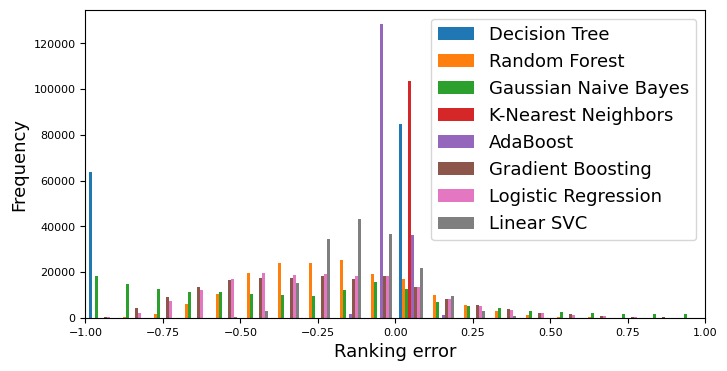

In [37]:
N_seeds = 20  # number of seeds
data_name = 'GermanCredit'

dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=100)
nb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=5)
adaboost = AdaBoostClassifier(n_estimators=50)
gb = GradientBoostingClassifier()

lr = LogisticRegression()
svc = LinearSVC(C=1.0,max_iter=5000)

model_name_list = np.array(
    [[dt, 'Decision Tree'],
     [rf, 'Random Forest'],
     [nb, 'Gaussian Naive Bayes'],
     [knn, 'K-Nearest Neighbors'],
     [adaboost, 'AdaBoost'],
     [gb, 'Gradient Boosting'],
     [lr, 'Logistic Regression'],
     [svc, 'Linear SVC']])

x, y = Data_load(data_name)  # import data

perf = pd.DataFrame(columns=['name', 'AUC', 'bAUC', 'FI', 'Accuracy', 'Precision', 'Recall', 'Conf_matrix', 'error'])  # record results

for clf, name in model_name_list:
    AUC_mean = 0
    FI_mean = 0
    bAUC_mean = 0
    accuracy_mean = 0
    top_k_accuracy_mean = 0
    precision_mean = 0
    recall_mean = 0
    f1_mean = 0
    mcc_mean = 0
    conf_matrix_mean = np.zeros((2, 2))
    error_total = np.array([])
    for _seed in range(N_seeds):

        np.random.seed(_seed)
        X_sample, X_test, y_sample, y_test = train_test_split(x, y, test_size=0.2)

        scaler = StandardScaler()
        X_sample = scaler.fit_transform(X_sample)
        X_test = scaler.transform(X_test)
        X = scaler.transform(x)

        clf.fit(X_sample, y_sample)
        if clf == knn:  # If KNN classifier, no need to predict_proba
            prob_pos = clf.predict(X_test)
        elif clf == lr or clf == svc:
            func = clf.decision_function(X_test)
            prob_pos = 1/(1 + np.exp(-func))  # get probability by sigmoid function
        else:
            prob_pos = clf.predict_proba(X_test)[:, 1]  # Probability of positive class

        y_predict = clf.predict(X_test)
        

        AUC = roc_auc_score(y_test, prob_pos)
        FI, error = FI_calculation(prob_pos, y_test)
        bAUC = bAUC_calculation(error)

        accuracy = accuracy_score(y_test, y_predict)
        accuracy_mean += accuracy / N_seeds

        f1 = f1_score(y_test, y_predict)
        f1_mean += f1 / N_seeds

        mcc = matthews_corrcoef(y_test, y_predict)
        mcc_mean += mcc / N_seeds

        precision = precision_score(y_test, y_predict)
        precision_mean += precision / N_seeds

        recall = recall_score(y_test, y_predict)
        recall_mean += recall / N_seeds

        conf_matrix = confusion_matrix(y_test, y_predict, normalize='all')
        conf_matrix_mean += conf_matrix / N_seeds

        AUC_mean += AUC / N_seeds
        FI_mean += FI / N_seeds
        bAUC_mean += bAUC / N_seeds
        error_total = np.concatenate((error_total, error))

    perf_clf = pd.DataFrame({'name': [name],
                             'AUC': [AUC_mean],
                             'bAUC': [bAUC_mean],
                             'FI': [FI_mean],
                             'Accuracy': [accuracy_mean],
                             'TN_and_FP': [conf_matrix_mean[0]],
                             'FN_and_TP': [conf_matrix_mean[1]],
                             'Precision': [precision_mean],
                             'Recall': [recall_mean],
                             'F1': [f1_mean],
                             'MCC': [mcc_mean],
                             'error': [error_total]})

    perf = pd.concat([perf, perf_clf])

print(perf[['name', 'AUC', 'bAUC', 'FI', 'Accuracy', 'Precision', 'Recall', 'TN_and_FP', 'FN_and_TP', 'F1', 'MCC']])

plt.figure(figsize=(8, 4))
plt.hist(perf['error'].values, bins=40)
plt.legend(['Decision Tree', 'Random Forest', 'Gaussian Naive Bayes', 'K-Nearest Neighbors', 'AdaBoost', 'Gradient Boosting', 'Logistic Regression', 'Linear SVC'], fontsize=13)
ax = plt.gca()
ax.set_xlim(-1, 1)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('Ranking error', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.savefig('rank_error_Diabetes.png', dpi=300)
plt.show()

# **------------------------------------------------------------**
# **Dataset: Breast Cancer Wisconsin Prognostic** 
# **------------------------------------------------------------**

                   name       AUC      bAUC        FI  Accuracy  Precision  \
0         Decision Tree  0.601063  0.216817       inf   0.69875   0.828241   
0         Random Forest  0.654825  0.267894  0.281128   0.81750   0.819207   
0  Gaussian Naive Bayes  0.636897  0.199227       inf   0.68625   0.840880   
0   K-Nearest Neighbors  0.616727  0.328696  1.428650   0.79500   0.825384   
0              AdaBoost  0.734625  0.368538       inf   0.76625   0.841856   
0     Gradient Boosting  0.739716  0.386834  0.405518   0.80875   0.846896   
0   Logistic Regression  0.773854  0.454862  0.275635   0.79000   0.851771   
0            Linear SVC  0.795421  0.519927  0.181183   0.79125   0.873454   

     Recall                                    TN_and_FP  \
0  0.775969   [0.09125000000000003, 0.12625000000000003]   
0  0.984236  [0.047500000000000014, 0.17000000000000004]   
0  0.734231                  [0.11, 0.10750000000000004]   
0  0.933560   [0.06375000000000001, 0.15375000000000005] 

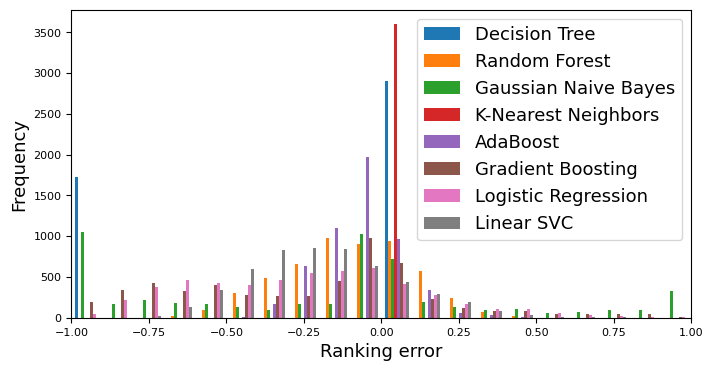

In [38]:
N_seeds = 20  # number of seeds
data_name = 'BreastCancerPrognostic'

dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=100)
nb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=5)
adaboost = AdaBoostClassifier(n_estimators=50)
gb = GradientBoostingClassifier()

lr = LogisticRegression()
svc = LinearSVC(C=1.0,max_iter=5000)

model_name_list = np.array(
    [[dt, 'Decision Tree'],
     [rf, 'Random Forest'],
     [nb, 'Gaussian Naive Bayes'],
     [knn, 'K-Nearest Neighbors'],
     [adaboost, 'AdaBoost'],
     [gb, 'Gradient Boosting'],
     [lr, 'Logistic Regression'],
     [svc, 'Linear SVC']])

x, y = Data_load(data_name)  # import data

perf = pd.DataFrame(columns=['name', 'AUC', 'bAUC', 'FI', 'Accuracy', 'Precision', 'Recall', 'Conf_matrix', 'error'])  # record results

for clf, name in model_name_list:
    AUC_mean = 0
    FI_mean = 0
    bAUC_mean = 0
    accuracy_mean = 0
    top_k_accuracy_mean = 0
    precision_mean = 0
    recall_mean = 0
    f1_mean = 0
    mcc_mean = 0
    conf_matrix_mean = np.zeros((2, 2))
    error_total = np.array([])
    for _seed in range(N_seeds):

        np.random.seed(_seed)
        X_sample, X_test, y_sample, y_test = train_test_split(x, y, test_size=0.2)

        scaler = StandardScaler()
        X_sample = scaler.fit_transform(X_sample)
        X_test = scaler.transform(X_test)
        X = scaler.transform(x)

        clf.fit(X_sample, y_sample)
        if clf == knn:  # If KNN classifier, no need to predict_proba
            prob_pos = clf.predict(X_test)
        elif clf == lr or clf == svc:
            func = clf.decision_function(X_test)
            prob_pos = 1/(1 + np.exp(-func))  # get probability by sigmoid function
        else:
            prob_pos = clf.predict_proba(X_test)[:, 1]  # Probability of positive class

        y_predict = clf.predict(X_test)
        

        AUC = roc_auc_score(y_test, prob_pos)
        FI, error = FI_calculation(prob_pos, y_test)
        bAUC = bAUC_calculation(error)

        accuracy = accuracy_score(y_test, y_predict)
        accuracy_mean += accuracy / N_seeds

        f1 = f1_score(y_test, y_predict)
        f1_mean += f1 / N_seeds

        mcc = matthews_corrcoef(y_test, y_predict)
        mcc_mean += mcc / N_seeds

        precision = precision_score(y_test, y_predict)
        precision_mean += precision / N_seeds

        recall = recall_score(y_test, y_predict)
        recall_mean += recall / N_seeds

        conf_matrix = confusion_matrix(y_test, y_predict, normalize='all')
        conf_matrix_mean += conf_matrix / N_seeds

        AUC_mean += AUC / N_seeds
        FI_mean += FI / N_seeds
        bAUC_mean += bAUC / N_seeds
        error_total = np.concatenate((error_total, error))

    perf_clf = pd.DataFrame({'name': [name],
                             'AUC': [AUC_mean],
                             'bAUC': [bAUC_mean],
                             'FI': [FI_mean],
                             'Accuracy': [accuracy_mean],
                             'TN_and_FP': [conf_matrix_mean[0]],
                             'FN_and_TP': [conf_matrix_mean[1]],
                             'Precision': [precision_mean],
                             'Recall': [recall_mean],
                             'F1': [f1_mean],
                             'MCC': [mcc_mean],
                             'error': [error_total]})

    perf = pd.concat([perf, perf_clf])

print(perf[['name', 'AUC', 'bAUC', 'FI', 'Accuracy', 'Precision', 'Recall', 'TN_and_FP', 'FN_and_TP', 'F1', 'MCC']])

plt.figure(figsize=(8, 4))
plt.hist(perf['error'].values, bins=40)
plt.legend(['Decision Tree', 'Random Forest', 'Gaussian Naive Bayes', 'K-Nearest Neighbors', 'AdaBoost', 'Gradient Boosting', 'Logistic Regression', 'Linear SVC'], fontsize=13)
ax = plt.gca()
ax.set_xlim(-1, 1)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('Ranking error', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.savefig('rank_error_Diabetes.png', dpi=300)
plt.show()

# **------------------------------------------------------------**
# **Dataset: Australian Cretdit Approval** 
# **------------------------------------------------------------**

                   name       AUC      bAUC        FI  Accuracy  Precision  \
0         Decision Tree  0.817104  0.634113  0.334473  0.817754   0.790144   
0         Random Forest  0.932784  0.831697  0.141724  0.865580   0.843997   
0  Gaussian Naive Bayes  0.891672  0.619957  0.282379  0.800000   0.847520   
0   K-Nearest Neighbors  0.833819  0.667543  0.613220  0.835507   0.824216   
0              AdaBoost  0.910023  0.724050  0.026093  0.844565   0.816094   
0     Gradient Boosting  0.934898  0.824697  0.163727  0.857609   0.829763   
0   Logistic Regression  0.929149  0.811069  0.160828  0.865580   0.829041   
0            Linear SVC  0.927924  0.816726  0.082031  0.859058   0.804857   

     Recall                                   TN_and_FP  \
0  0.809682  [0.45471014492753625, 0.09673913043478259]   
0  0.863014  [0.47898550724637684, 0.07246376811594205]   
0  0.677294   [0.4960144927536232, 0.05543478260869566]   
0  0.809473   [0.4728260869565218, 0.07862318840579711]   
0 

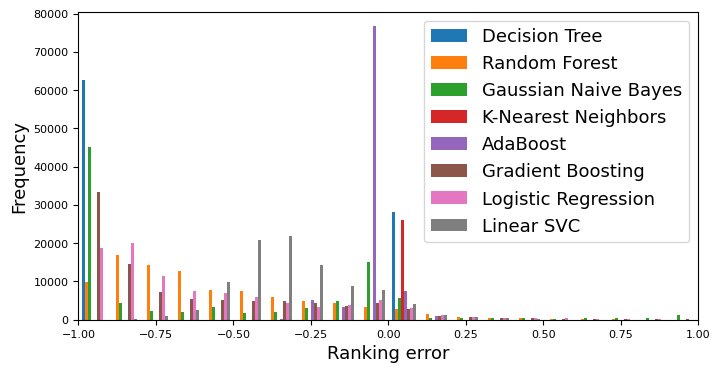

In [39]:
N_seeds = 20  # number of seeds
data_name = 'Australian'

dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=100)
nb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=5)
adaboost = AdaBoostClassifier(n_estimators=50)
gb = GradientBoostingClassifier()

lr = LogisticRegression()
svc = LinearSVC(C=1.0,max_iter=5000)

model_name_list = np.array(
    [[dt, 'Decision Tree'],
     [rf, 'Random Forest'],
     [nb, 'Gaussian Naive Bayes'],
     [knn, 'K-Nearest Neighbors'],
     [adaboost, 'AdaBoost'],
     [gb, 'Gradient Boosting'],
     [lr, 'Logistic Regression'],
     [svc, 'Linear SVC']])

x, y = Data_load(data_name)  # import data

perf = pd.DataFrame(columns=['name', 'AUC', 'bAUC', 'FI', 'Accuracy', 'Precision', 'Recall', 'Conf_matrix', 'error'])  # record results

for clf, name in model_name_list:
    AUC_mean = 0
    FI_mean = 0
    bAUC_mean = 0
    accuracy_mean = 0
    top_k_accuracy_mean = 0
    precision_mean = 0
    recall_mean = 0
    f1_mean = 0
    mcc_mean = 0
    conf_matrix_mean = np.zeros((2, 2))
    error_total = np.array([])
    for _seed in range(N_seeds):

        np.random.seed(_seed)
        X_sample, X_test, y_sample, y_test = train_test_split(x, y, test_size=0.2)

        scaler = StandardScaler()
        X_sample = scaler.fit_transform(X_sample)
        X_test = scaler.transform(X_test)
        X = scaler.transform(x)

        clf.fit(X_sample, y_sample)
        if clf == knn:  # If KNN classifier, no need to predict_proba
            prob_pos = clf.predict(X_test)
        elif clf == lr or clf == svc:
            func = clf.decision_function(X_test)
            prob_pos = 1/(1 + np.exp(-func))  # get probability by sigmoid function
        else:
            prob_pos = clf.predict_proba(X_test)[:, 1]  # Probability of positive class

        y_predict = clf.predict(X_test)
        

        AUC = roc_auc_score(y_test, prob_pos)
        FI, error = FI_calculation(prob_pos, y_test)
        bAUC = bAUC_calculation(error)

        accuracy = accuracy_score(y_test, y_predict)
        accuracy_mean += accuracy / N_seeds

        f1 = f1_score(y_test, y_predict)
        f1_mean += f1 / N_seeds

        mcc = matthews_corrcoef(y_test, y_predict)
        mcc_mean += mcc / N_seeds

        precision = precision_score(y_test, y_predict)
        precision_mean += precision / N_seeds

        recall = recall_score(y_test, y_predict)
        recall_mean += recall / N_seeds

        conf_matrix = confusion_matrix(y_test, y_predict, normalize='all')
        conf_matrix_mean += conf_matrix / N_seeds

        AUC_mean += AUC / N_seeds
        FI_mean += FI / N_seeds
        bAUC_mean += bAUC / N_seeds
        error_total = np.concatenate((error_total, error))

    perf_clf = pd.DataFrame({'name': [name],
                             'AUC': [AUC_mean],
                             'bAUC': [bAUC_mean],
                             'FI': [FI_mean],
                             'Accuracy': [accuracy_mean],
                             'TN_and_FP': [conf_matrix_mean[0]],
                             'FN_and_TP': [conf_matrix_mean[1]],
                             'Precision': [precision_mean],
                             'Recall': [recall_mean],
                             'F1': [f1_mean],
                             'MCC': [mcc_mean],
                             'error': [error_total]})

    perf = pd.concat([perf, perf_clf])

print(perf[['name', 'AUC', 'bAUC', 'FI', 'Accuracy', 'Precision', 'Recall', 'TN_and_FP', 'FN_and_TP', 'F1', 'MCC']])

plt.figure(figsize=(8, 4))
plt.hist(perf['error'].values, bins=40)
plt.legend(['Decision Tree', 'Random Forest', 'Gaussian Naive Bayes', 'K-Nearest Neighbors', 'AdaBoost', 'Gradient Boosting', 'Logistic Regression', 'Linear SVC'], fontsize=13)
ax = plt.gca()
ax.set_xlim(-1, 1)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('Ranking error', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.savefig('rank_error_Diabetes.png', dpi=300)
plt.show()

# **------------------------------------------------------------**
# **Dataset: Johns Hopkins University Ionosphere** 
# **------------------------------------------------------------**

                   name       AUC      bAUC        FI  Accuracy  Precision  \
0         Decision Tree  0.874887  0.749506  0.246155  0.886620   0.911001   
0         Random Forest  0.989408  0.969939  0.052795  0.944366   0.945760   
0  Gaussian Naive Bayes  0.949779  0.770886  0.152069  0.889437   0.875684   
0   K-Nearest Neighbors  0.805676  0.805362  0.246948  0.858451   0.829724   
0              AdaBoost  0.957496  0.892912  0.032593  0.932394   0.924920   
0     Gradient Boosting  0.980600  0.923712  0.092255  0.938028   0.933103   
0   Logistic Regression  0.908017  0.784804  0.115387  0.889437   0.875212   
0            Linear SVC  0.863855  0.727369  0.121857  0.884507   0.876835   

     Recall                                    TN_and_FP  \
0  0.915910    [0.2887323943661972, 0.05845070422535211]   
0  0.970269    [0.3112676056338028, 0.03591549295774648]   
0  0.970018    [0.25633802816901413, 0.0908450704225352]   
0  0.984922   [0.21549295774647886, 0.13169014084507044] 

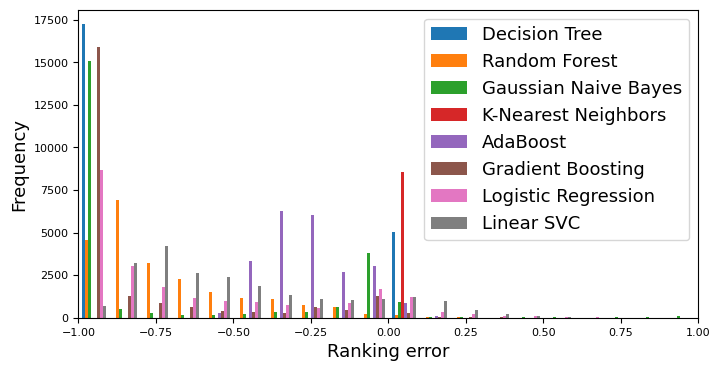

In [40]:
N_seeds = 20  # number of seeds
data_name = 'Ionosphere'

dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=100)
nb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=5)
adaboost = AdaBoostClassifier(n_estimators=50)
gb = GradientBoostingClassifier()

lr = LogisticRegression()
svc = LinearSVC(C=1.0,max_iter=5000)

model_name_list = np.array(
    [[dt, 'Decision Tree'],
     [rf, 'Random Forest'],
     [nb, 'Gaussian Naive Bayes'],
     [knn, 'K-Nearest Neighbors'],
     [adaboost, 'AdaBoost'],
     [gb, 'Gradient Boosting'],
     [lr, 'Logistic Regression'],
     [svc, 'Linear SVC']])

x, y = Data_load(data_name)  # import data

perf = pd.DataFrame(columns=['name', 'AUC', 'bAUC', 'FI', 'Accuracy', 'Precision', 'Recall', 'Conf_matrix', 'error'])  # record results

for clf, name in model_name_list:
    AUC_mean = 0
    FI_mean = 0
    bAUC_mean = 0
    accuracy_mean = 0
    top_k_accuracy_mean = 0
    precision_mean = 0
    recall_mean = 0
    f1_mean = 0
    mcc_mean = 0
    conf_matrix_mean = np.zeros((2, 2))
    error_total = np.array([])
    for _seed in range(N_seeds):

        np.random.seed(_seed)
        X_sample, X_test, y_sample, y_test = train_test_split(x, y, test_size=0.2)

        scaler = StandardScaler()
        X_sample = scaler.fit_transform(X_sample)
        X_test = scaler.transform(X_test)
        X = scaler.transform(x)

        clf.fit(X_sample, y_sample)
        if clf == knn:  # If KNN classifier, no need to predict_proba
            prob_pos = clf.predict(X_test)
        elif clf == lr or clf == svc:
            func = clf.decision_function(X_test)
            prob_pos = 1/(1 + np.exp(-func))  # get probability by sigmoid function
        else:
            prob_pos = clf.predict_proba(X_test)[:, 1]  # Probability of positive class

        y_predict = clf.predict(X_test)
        

        AUC = roc_auc_score(y_test, prob_pos)
        FI, error = FI_calculation(prob_pos, y_test)
        bAUC = bAUC_calculation(error)

        accuracy = accuracy_score(y_test, y_predict)
        accuracy_mean += accuracy / N_seeds

        f1 = f1_score(y_test, y_predict)
        f1_mean += f1 / N_seeds

        mcc = matthews_corrcoef(y_test, y_predict)
        mcc_mean += mcc / N_seeds

        precision = precision_score(y_test, y_predict)
        precision_mean += precision / N_seeds

        recall = recall_score(y_test, y_predict)
        recall_mean += recall / N_seeds

        conf_matrix = confusion_matrix(y_test, y_predict, normalize='all')
        conf_matrix_mean += conf_matrix / N_seeds

        AUC_mean += AUC / N_seeds
        FI_mean += FI / N_seeds
        bAUC_mean += bAUC / N_seeds
        error_total = np.concatenate((error_total, error))

    perf_clf = pd.DataFrame({'name': [name],
                             'AUC': [AUC_mean],
                             'bAUC': [bAUC_mean],
                             'FI': [FI_mean],
                             'Accuracy': [accuracy_mean],
                             'TN_and_FP': [conf_matrix_mean[0]],
                             'FN_and_TP': [conf_matrix_mean[1]],
                             'Precision': [precision_mean],
                             'Recall': [recall_mean],
                             'F1': [f1_mean],
                             'MCC': [mcc_mean],
                             'error': [error_total]})

    perf = pd.concat([perf, perf_clf])

print(perf[['name', 'AUC', 'bAUC', 'FI', 'Accuracy', 'Precision', 'Recall', 'TN_and_FP', 'FN_and_TP', 'F1', 'MCC']])

plt.figure(figsize=(8, 4))
plt.hist(perf['error'].values, bins=40)
plt.legend(['Decision Tree', 'Random Forest', 'Gaussian Naive Bayes', 'K-Nearest Neighbors', 'AdaBoost', 'Gradient Boosting', 'Logistic Regression', 'Linear SVC'], fontsize=13)
ax = plt.gca()
ax.set_xlim(-1, 1)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('Ranking error', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.savefig('rank_error_Diabetes.png', dpi=300)
plt.show()

# **------------------------------------------------------------**
# **Dataset: Sonar** 
# **------------------------------------------------------------**

                   name       AUC      bAUC        FI  Accuracy  Precision  \
0         Decision Tree  0.710613  0.420419  0.570709  0.711905   0.713809   
0         Random Forest  0.929139  0.829736  0.058899  0.827381   0.880045   
0  Gaussian Naive Bayes  0.776984  0.353891  0.656342  0.663095   0.611618   
0   K-Nearest Neighbors  0.795220  0.626618  0.609314  0.797619   0.856466   
0              AdaBoost  0.866750  0.683119  0.032410  0.804762   0.803793   
0     Gradient Boosting  0.905706  0.714867  0.211975  0.819048   0.845780   
0   Logistic Regression  0.854668  0.639691  0.238495  0.780952   0.780297   
0            Linear SVC  0.831868  0.594988  0.248260  0.763095   0.758507   

     Recall                                    TN_and_FP  \
0  0.651977   [0.40357142857142847, 0.12380952380952381]   
0  0.735082   [0.48095238095238085, 0.04642857142857143]   
0  0.787269    [0.2904761904761905, 0.23690476190476187]   
0  0.693899  [0.47142857142857125, 0.055952380952380934] 

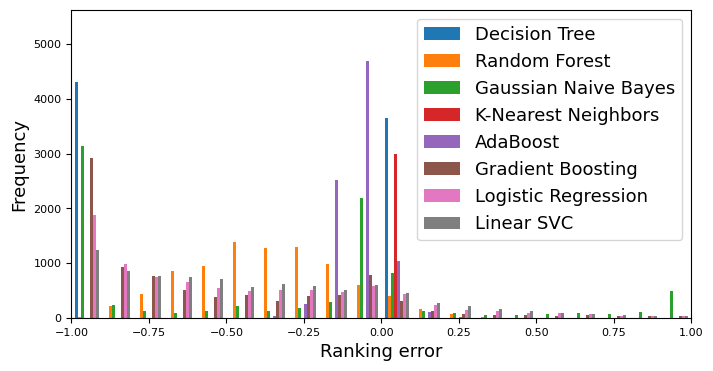

In [41]:
N_seeds = 20  # number of seeds
data_name = 'Sonar'

dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=100)
nb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=5)
adaboost = AdaBoostClassifier(n_estimators=50)
gb = GradientBoostingClassifier()

lr = LogisticRegression()
svc = LinearSVC(C=1.0,max_iter=5000)

model_name_list = np.array(
    [[dt, 'Decision Tree'],
     [rf, 'Random Forest'],
     [nb, 'Gaussian Naive Bayes'],
     [knn, 'K-Nearest Neighbors'],
     [adaboost, 'AdaBoost'],
     [gb, 'Gradient Boosting'],
     [lr, 'Logistic Regression'],
     [svc, 'Linear SVC']])

x, y = Data_load(data_name)  # import data

perf = pd.DataFrame(columns=['name', 'AUC', 'bAUC', 'FI', 'Accuracy', 'Precision', 'Recall', 'Conf_matrix', 'error'])  # record results

for clf, name in model_name_list:
    AUC_mean = 0
    FI_mean = 0
    bAUC_mean = 0
    accuracy_mean = 0
    top_k_accuracy_mean = 0
    precision_mean = 0
    recall_mean = 0
    f1_mean = 0
    mcc_mean = 0
    conf_matrix_mean = np.zeros((2, 2))
    error_total = np.array([])
    for _seed in range(N_seeds):

        np.random.seed(_seed)
        X_sample, X_test, y_sample, y_test = train_test_split(x, y, test_size=0.2)

        scaler = StandardScaler()
        X_sample = scaler.fit_transform(X_sample)
        X_test = scaler.transform(X_test)
        X = scaler.transform(x)

        clf.fit(X_sample, y_sample)
        if clf == knn:  # If KNN classifier, no need to predict_proba
            prob_pos = clf.predict(X_test)
        elif clf == lr or clf == svc:
            func = clf.decision_function(X_test)
            prob_pos = 1/(1 + np.exp(-func))  # get probability by sigmoid function
        else:
            prob_pos = clf.predict_proba(X_test)[:, 1]  # Probability of positive class

        y_predict = clf.predict(X_test)
        

        AUC = roc_auc_score(y_test, prob_pos)
        FI, error = FI_calculation(prob_pos, y_test)
        bAUC = bAUC_calculation(error)

        accuracy = accuracy_score(y_test, y_predict)
        accuracy_mean += accuracy / N_seeds

        f1 = f1_score(y_test, y_predict)
        f1_mean += f1 / N_seeds

        mcc = matthews_corrcoef(y_test, y_predict)
        mcc_mean += mcc / N_seeds

        precision = precision_score(y_test, y_predict)
        precision_mean += precision / N_seeds

        recall = recall_score(y_test, y_predict)
        recall_mean += recall / N_seeds

        conf_matrix = confusion_matrix(y_test, y_predict, normalize='all')
        conf_matrix_mean += conf_matrix / N_seeds

        AUC_mean += AUC / N_seeds
        FI_mean += FI / N_seeds
        bAUC_mean += bAUC / N_seeds
        error_total = np.concatenate((error_total, error))

    perf_clf = pd.DataFrame({'name': [name],
                             'AUC': [AUC_mean],
                             'bAUC': [bAUC_mean],
                             'FI': [FI_mean],
                             'Accuracy': [accuracy_mean],
                             'TN_and_FP': [conf_matrix_mean[0]],
                             'FN_and_TP': [conf_matrix_mean[1]],
                             'Precision': [precision_mean],
                             'Recall': [recall_mean],
                             'F1': [f1_mean],
                             'MCC': [mcc_mean],
                             'error': [error_total]})

    perf = pd.concat([perf, perf_clf])

print(perf[['name', 'AUC', 'bAUC', 'FI', 'Accuracy', 'Precision', 'Recall', 'TN_and_FP', 'FN_and_TP', 'F1', 'MCC']])

plt.figure(figsize=(8, 4))
plt.hist(perf['error'].values, bins=40)
plt.legend(['Decision Tree', 'Random Forest', 'Gaussian Naive Bayes', 'K-Nearest Neighbors', 'AdaBoost', 'Gradient Boosting', 'Logistic Regression', 'Linear SVC'], fontsize=13)
ax = plt.gca()
ax.set_xlim(-1, 1)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('Ranking error', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.savefig('rank_error_Diabetes.png', dpi=300)
plt.show()